<a href="https://colab.research.google.com/github/SangMin316/EEG_Data/blob/main/221004_CHB_MIT_test_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gc
gc.collect()

36

In [ ]:
from typing_extensions import dataclass_transform
from scipy import signal
from torch.utils.data import Dataset
import torch
import numpy as np
import torch.nn as nn

# 임시적으로 reprentation을 받는 방법,,
class CHB_MIT_Dataset(Dataset):
    def __init__(self, idxs, ssl=True, sfreq=200, ratio = None):
        #self.path = os.getcwd()
        self.path = '/content/drive/MyDrive/EEG_data/CHB_MIT/'

        # temporal
        temporal_rept = np.load('/content/drive/MyDrive/EEG_data/CHB_MIT/feature/rept_100Hz_(20,0.75,0.75).npy')
      
        #sepctral
        spectral_rept = np.load('/content/drive/MyDrive/EEG_data/CHB_MIT/feature/spec_feature.npy')
        
        #spatial
        spatial_rept = np.load('/content/drive/MyDrive/EEG_data/CHB_MIT/feature/feature_save.npy')


        labels = []        
        for idx in idxs:
            y = np.load(self.path +  'label/' + f'Data_Label{idx:02d}.npy')
            labels.append(y)

        del  y
        labels = np.array(np.concatenate(labels, axis=0))
        labels = torch.tensor(labels).long()
        labels = nn.functional.one_hot(labels,num_classes=2)

        # data = np.concatenate(data, axis=0)
        
        # data = signal.resample(data, sfreq)

        self.spectral_rept = spectral_rept
        self.temporal_rept = temporal_rept
        self.spatial_rept = spatial_rept
       
        self.labels = labels
        self.ssl = ssl
        self.sfreq = sfreq

    def __len__(self):
        return self.temporal_rept.shape[0]

    def __getitem__(self, item):
        return { 'spectral' : torch.tensor(self.spectral_rept[item]),
                 'spatial'  : torch.tensor(self.spatial_rept[item]),
                 'temporal' : torch.tensor(self.temporal_rept[item]),
                  'label' : self.labels[item]
                }

In [ ]:
a = np.load('/content/drive/MyDrive/EEG_data/CHB_MIT/feature/feature_save.npy')

In [ ]:
a.shape

(4083, 60)

In [ ]:
idx = list(range(1,21))
CHBdataset = CHB_MIT_Dataset(idx)


In [ ]:
train_size = int(0.8 * len(CHBdataset))
val_size = int(0.1 * len(CHBdataset))
test_size = len(CHBdataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(CHBdataset, [train_size, val_size, test_size],
                                                                         generator=torch.Generator().manual_seed(16))

In [ ]:
from torch.utils.data import DataLoader

trainLoader = DataLoader(train_dataset, batch_size = 128, shuffle=False)

In [ ]:
for batch_idx, batch in enumerate(trainLoader):
  print( 'n:',batch_idx, '' , batch['temporal'].shape, '',batch['spectral'].shape ,'label: ', batch['label'].shape)

n: 0  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 1  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 2  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 3  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 4  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 5  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 6  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 7  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 8  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 9  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label:  torch.Size([128, 2])
n: 10  torch.Size([128, 23, 64, 100])  torch.Size([128, 23, 64]) label

In [ ]:
batch['label']

tensor([[0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        

In [ ]:
!pip install separableconv-torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import separableconv.nn as nn

class FeatureEncoder(nn.Module):
    def __init__(self,x):
        super(FeatureEncoder, self).__init__()
        self.sepctral_rept = x['spectral']
        self.temporal_rept = x['temporal']
        self.spatial_rept = x['spatial']
        
        #self.GVP = torch.var(dim=-1)

    def Temporal_GAP(self, x):
         #  x.shape = batch,  channel, feature, time -->
        a = torch.tensor(x)
        a = torch.mean(a, 1) # channel
        a = torch.mean(a, 2) # time
        return a

    def Temporal_GVP(self, x):
         #  x.shape = batch,  channel, feature, time -->
        a = torch.tensor(x)
        a = torch.var(a, 1) # channel
        a = torch.var(a, 2) # time
        return a    

    def forward(self):
        f_1 = self.sepctral_rept
        f_2 = self.temporal_rept

        f_GAP = torch.cat((torch.mean(f_1,1), self.Temporal_GAP(f_2), self.spatial_rept) , axis=1)
        f_GVP = torch.cat((torch.var(f_1, dim=1), self.Temporal_GVP(f_2), self.spatial_rept), axis=1)
        # GVP가 정확하지가 않음,,

        return  f_GAP, f_GVP


class StatisticianModule(nn.Module):
    def __init__(self, dense, classes):
        super(StatisticianModule, self).__init__()
        self.classes = classes

        self.softmax = torch.nn.Softmax(dim=1)
        self.c_dense = nn.Linear(int(64*2*2 + 60*2),dense ) #376 = sum(i=3) represntation*2 

        self.gap_pwconv = nn.Conv1d(int(64*2 + 60), dense, 1)
        self.gvp_pwconv = nn.Conv1d(int(64*2 + 60), dense, 1)

        self.fullconnect = nn.Linear(int(64*2+60), self.classes)


    def forward(self, f_GAP, f_GVP):
        #[batch, gap+gvp] -> [batch,dense]
      
        c = self.softmax(self.c_dense(torch.cat((f_GAP, f_GVP),axis=1)))

        #[batch, gap, 1] -> [batch, 1, dense] -> [batch, dense]
        f_GAP_d = self.gap_pwconv(f_GAP.unsqueeze(dim=-1)).squeeze()
        f_GVP_d = self.gvp_pwconv(f_GVP.unsqueeze(dim=-1)).squeeze()
        
        f_GAP_dd = torch.sum(c*f_GAP_d,dim=1)
        f_GVP_dd = torch.sum(c*f_GVP_d,dim=1)
       
        
        ALN = torch.div(torch.sub(f_GAP.T,f_GAP_dd),f_GAP_dd).T

        y_hat = self.fullconnect(ALN)
        # print('y_hat: ',y_hat.shape)
        return y_hat

In [ ]:
epochs = 40
learning_rate = 0.001
batch_size = 1024
model = StatisticianModule(300,2)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trainLoader = DataLoader(train_dataset, batch_size = batch_size, shuffle=False)
valLoader = DataLoader(val_dataset, batch_size = batch_size, shuffle=False)
testLoader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#"cpu"
print(device)

cuda:0


In [ ]:
loss_tr = []
loss_val = []
acc_tr = []
acc_val = []
for epoch in range(epochs):
    loss_ep = 0  # add batch loss in epoch
    acc_ep = 0
    for batch_idx, batch in enumerate(trainLoader):
        optimizer.zero_grad()
        f_GAP, f_GVP =  FeatureEncoder(batch).forward()
        pred  = model.forward(f_GAP, f_GVP).to(device)
        CrossEL = torch.nn.CrossEntropyLoss()
        label = batch['label'].type(torch.float64).to(device)
        # label = batch['label'].to(device)
        # print(pred.shape)
        loss = CrossEL(pred, label)
        loss.backward(retain_graph=True)
        optimizer.step() 

        _, label =  torch.max(label, 1)  
        _, predicted = torch.max(pred, 1)
        acc = (predicted == label).sum().item()
        acc = acc/batch['label'].shape[0] #batch size로 나눠주는 거
        loss_ep += loss.item()
        # print('acc:', acc)
        acc_ep += acc

    loss_tr.append((loss_ep)/len(trainLoader))
    acc_tr.append((acc_ep)/len(trainLoader))        

    loss_ep_val = 0
    acc_ep_val = 0
    
    for batch_idx, batch in enumerate(valLoader):
        f_GAP, f_GVP =  FeatureEncoder(batch).forward()
        pred  = model.forward(f_GAP, f_GVP).to(device)
        CrossEL = torch.nn.CrossEntropyLoss()
        label = batch['label'].type(torch.float64).to(device)
        loss = CrossEL(pred, label)
        
        _, label =  torch.max(label, 1)  
        _, predicted = torch.max(pred, 1)
        acc = (predicted == label).sum().item()
        acc = acc/batch['label'].shape[0] 

        loss_ep_val += loss.item()
        acc_ep_val += acc

    loss_val.append((loss_ep_val)/len(valLoader))
    acc_val.append((acc_ep_val)/len(valLoader))
    print("epoch : ", epoch, "  train loss : ", loss_tr[epoch], 'train acc : ', acc_tr[epoch], "    val loss : ", loss_val[epoch], 'val acc : ', acc_val[epoch])
        



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch :  0   train loss :  14.99903521863733 train acc :  0.5443278833762887     val loss :  0.6287127837456543 val acc :  0.6323529411764706
epoch :  1   train loss :  0.651161633392475 train acc :  0.6563078890141752     val loss :  0.658029584670622 val acc :  0.6617647058823529
epoch :  2   train loss :  0.6932508042584429 train acc :  0.654395034632732     val loss :  0.7216786748693124 val acc :  0.6470588235294118
epoch :  3   train loss :  0.7392004241487625 train acc :  0.6596579010953608     val loss :  0.7534704476905366 val acc :  0.6519607843137255
epoch :  4   train loss :  0.7559359306163426 train acc :  0.6611227448453608     val loss :  0.7551006122181813 val acc :  0.6519607843137255
epoch :  5   train loss :  0.747914696839074 train acc :  0.6608786042203608     val loss :  0.7360252126521778 val acc :  0.6519607843137255
epoch :  6   train loss :  0.7240932517967764 train acc :  0.6611227448453608     val loss :  0.7058523445408426 val acc :  0.6519607843137255
epoc

In [ ]:
batch['label'].shape[0]

408

In [ ]:
import pandas as pd
# 실험결과를 excel로 저장하는 방법
col = ['loss_tr','loss_val','acc_tr','acc_val']
data = np.array([loss_tr,
                 loss_val,
                 acc_tr,
                 acc_val])
print(data.shape)
data = np.transpose(data)
df = pd.DataFrame(data = data, columns= col)
df.to_excel('CHB_100Hz.xlsx', index = False)

(4, 40)


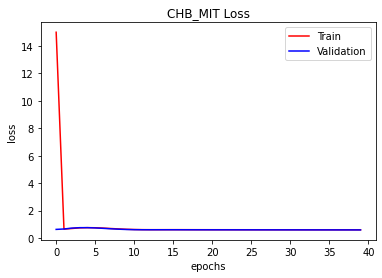

In [ ]:
import matplotlib.pyplot as plt
  
# plt.figure(figsize =(15, 10))
plt.plot(range(epochs), loss_tr, color='red')
plt.plot(range(epochs), loss_val, color='blue')
plt.title('CHB_MIT Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('CHB_100Hz_loss.png',bbox_inches = 'tight')
plt.show() 

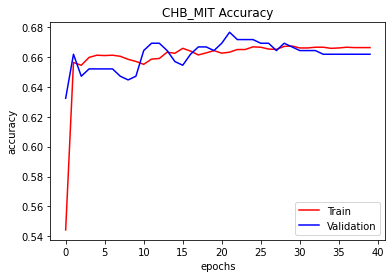

In [ ]:
# plt.figure(figsize =(15, 10))
plt.plot(range(epochs), acc_tr, color='red')
plt.plot(range(epochs), acc_val, color='blue')
plt.title('CHB_MIT Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('CHB_100Hz_accuracy.png',bbox_inches = 'tight')
plt.show()

In [ ]:
y = []
y_hat = []
acc = 0
for batch_idx, batch in enumerate(testLoader):
    f_GAP, f_GVP =  FeatureEncoder(batch).forward()
    pred  = model.forward(f_GAP, f_GVP).to(device)
    label = batch['label'].type(torch.float64).to(device)
    _, label =  torch.max(label, 1)  
    _, predicted = torch.max(pred, 1)
    acc = (predicted == label).sum().item()

    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
acc/batch['label'].shape[0]

0.6430317848410758